In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
df=pd.read_csv("kc_house_data[1].csv")

In [48]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [49]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df.drop(columns='id',inplace=True)

In [52]:
df.drop(columns='date',inplace=True)

In [53]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [54]:
df.shape

(21613, 19)

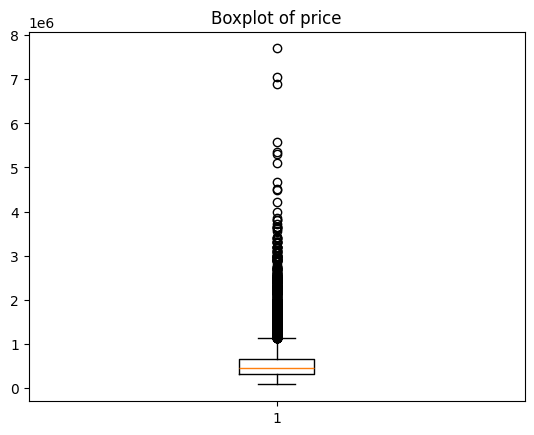

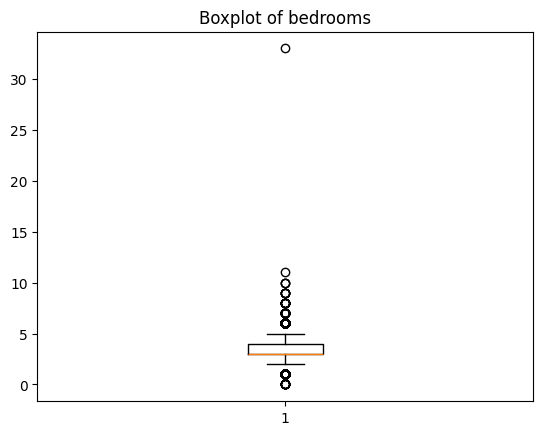

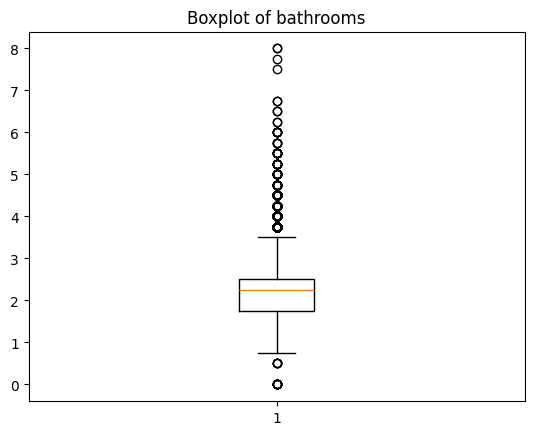

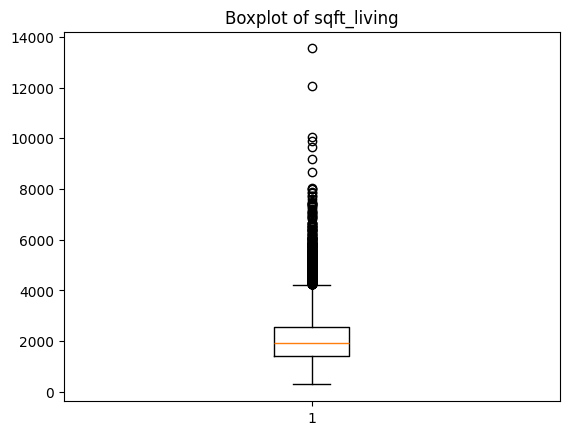

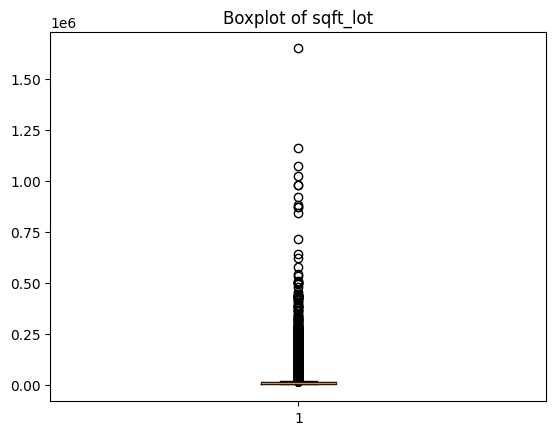

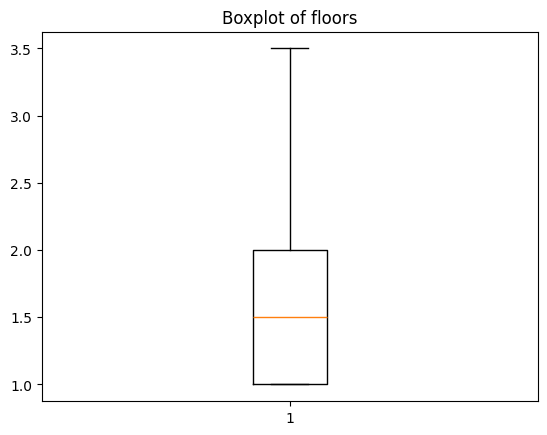

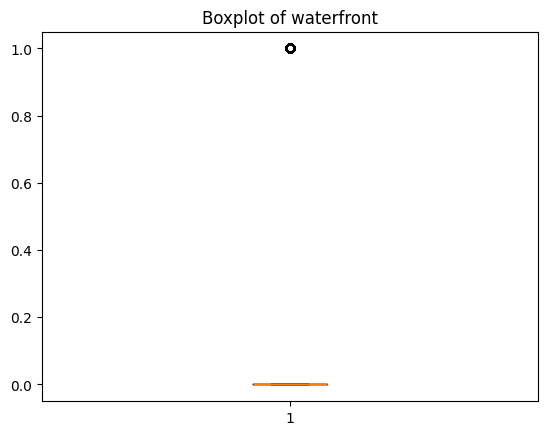

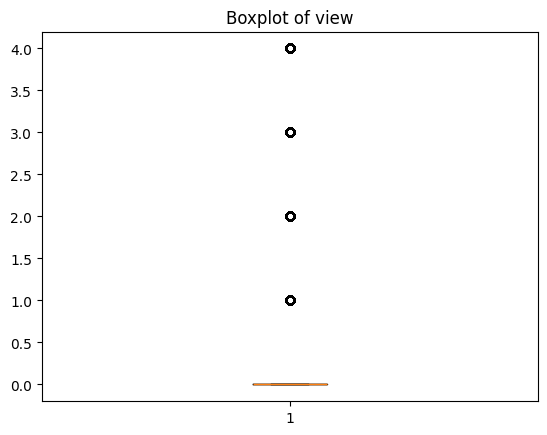

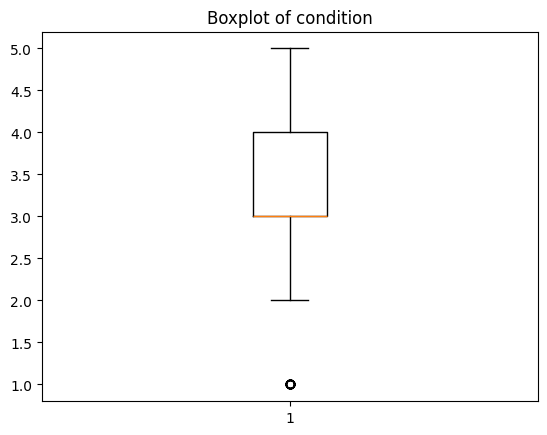

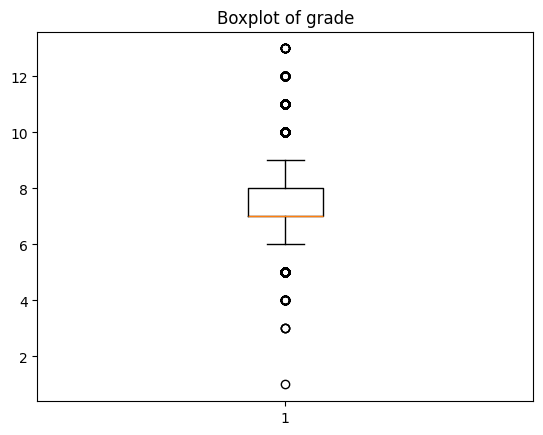

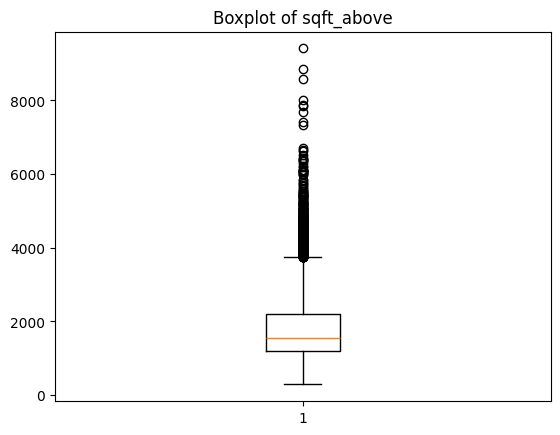

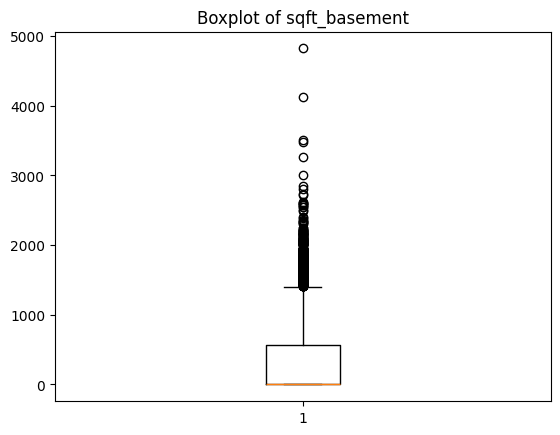

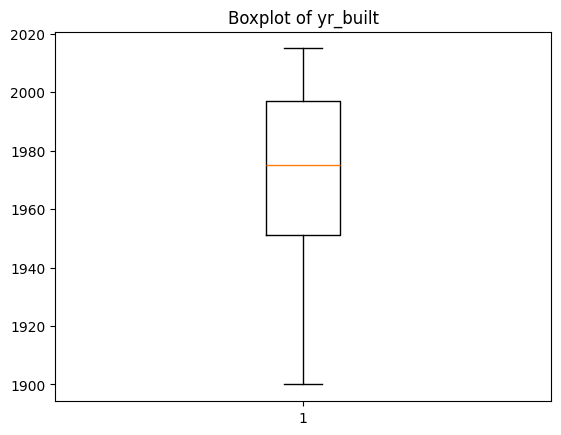

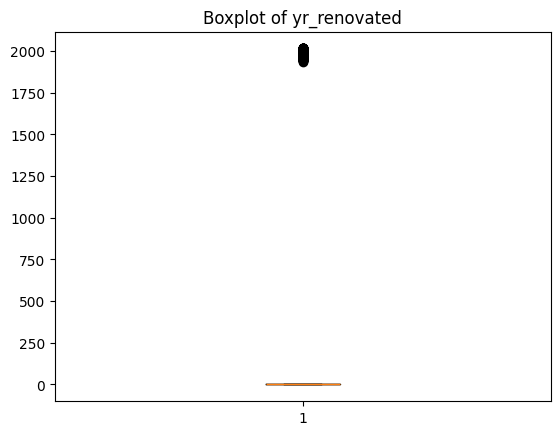

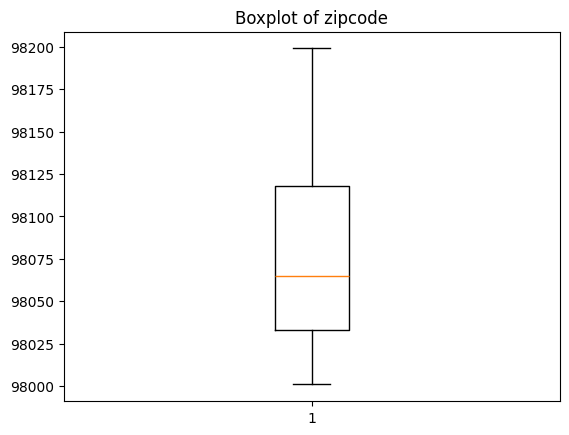

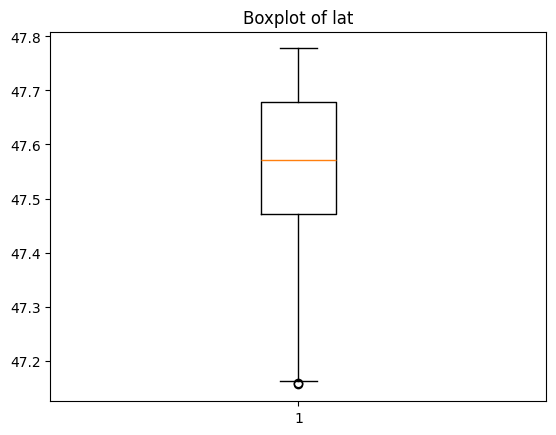

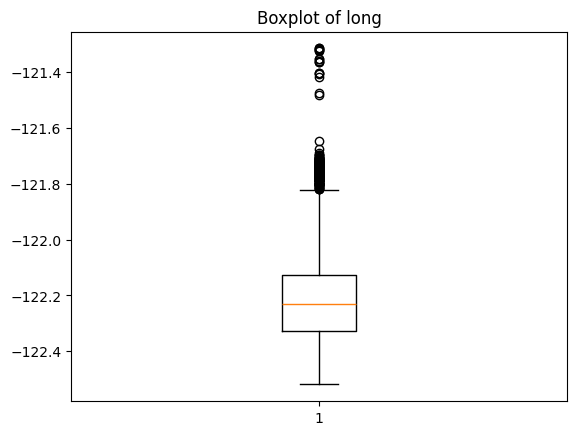

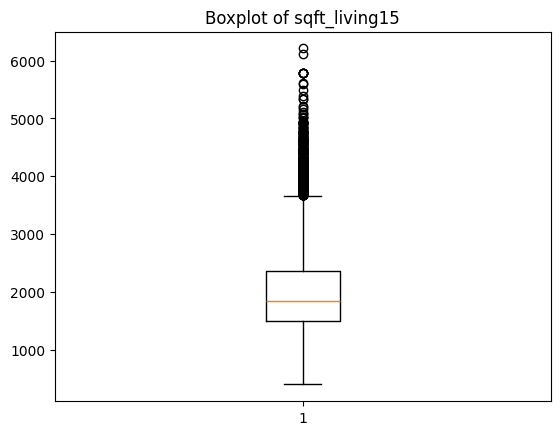

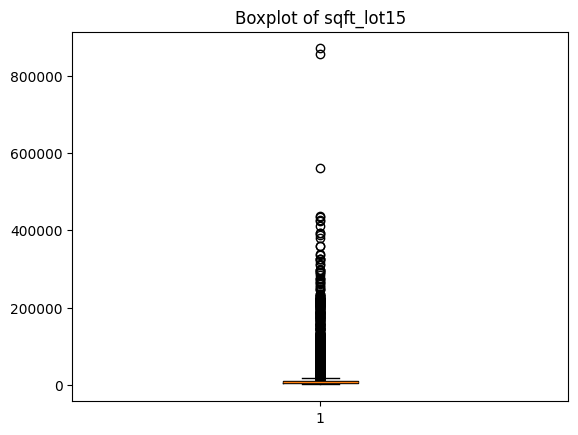

In [55]:
for i in df:
    plt.boxplot(df[i])
    plt.title(f"Boxplot of {i}")
    plt.show()


In [56]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [57]:
outlier_columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
outlier_ranges={}
for col in outlier_columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    min_range=q1-iqr*1.5
    max_range=q3+iqr*1.5
    outlier_ranges[col]=(min_range,max_range)
    df=df.loc[(df[col]>=min_range)&(df[col]<=max_range)]

In [58]:
features=list(df.drop(columns=['price','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15','waterfront','view']))

In [59]:
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'condition',
 'grade',
 'zipcode']

In [60]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [61]:
zipcode=list(df['zipcode'].unique())

In [62]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(drop='first',sparse_output=False)
res=onehot.fit_transform(df[['zipcode']])

In [63]:
res=pd.DataFrame(res,columns=onehot.get_feature_names_out(),dtype='int')

In [64]:
df.drop(columns='zipcode',inplace=True)

In [65]:
df.reset_index(drop=True,inplace=True)

In [66]:
df=df.join(res)

In [67]:
df['yr_built'].unique()

array([1955, 1933, 1965, 1987, 1995, 1963, 1960, 2003, 1942, 1977, 1900,
       1994, 1916, 1921, 1969, 1947, 1985, 1941, 1915, 1909, 1948, 2005,
       1929, 1981, 1904, 1996, 2000, 1922, 1959, 1966, 1953, 1950, 1927,
       2008, 1991, 1954, 1973, 2014, 1979, 1925, 1968, 1972, 1956, 1992,
       1964, 1952, 1961, 2006, 1988, 1962, 1939, 1975, 1910, 1978, 1984,
       1905, 1980, 2010, 1945, 1924, 1990, 1926, 1986, 1923, 1967, 1976,
       1999, 1901, 1949, 1993, 1920, 2007, 1943, 1983, 2004, 1940, 1918,
       1974, 1911, 1937, 1908, 1931, 1998, 1913, 1957, 2013, 1997, 2001,
       2012, 1971, 1989, 1917, 2002, 1946, 1951, 1958, 1944, 1907, 1902,
       2009, 1970, 1982, 1930, 1938, 1912, 1919, 1932, 1914, 1928, 1906,
       1936, 2011, 1903, 1934, 1935, 2015])

In [68]:
df['yr_renovated'].unique()

array([0])

In [69]:
df['age'] = 2025 - df['yr_built']

In [70]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'z

In [71]:
x=df.drop(columns=['price','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15','waterfront','view'])

In [92]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116

In [72]:
y=df['price']

In [73]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [74]:
x_scaled.shape

(13868, 75)

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=3)

In [76]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [77]:
model.coef_

array([-3.23581775e+03,  4.86317470e+03,  6.62608763e+04, -1.97165797e+03,
        1.35981329e+04,  3.79162260e+04,  6.20471181e+01,  3.75102985e+02,
        4.34385190e+04,  2.48666525e+04,  3.20486320e+04,  2.08778959e+04,
        2.71005767e+04,  2.30549989e+03,  1.54067163e+04,  3.65458446e+03,
        9.56271029e+03,  1.27772708e+03, -3.14733236e+03,  4.11839456e+03,
        2.43637756e+04,  1.60941248e+04,  3.06289267e+04,  5.66478819e+02,
        2.11043089e+03, -9.17903302e+02,  3.94755046e+04,  3.07547767e+04,
        7.91848302e+03,  1.37391970e+04,  3.35481581e+04,  2.74838807e+03,
        4.02174602e+04,  2.95043961e+04,  4.20981652e+03,  1.35976691e+04,
        5.76885805e+03,  1.36326414e+04,  8.46937109e+03,  2.51150001e+03,
        1.35350525e+04,  2.70858522e+04,  1.71791203e+04,  6.11165490e+03,
       -1.75465292e+03,  2.72704657e+04,  5.44084349e+04,  3.62040624e+04,
        1.53234249e+04,  3.66307011e+04,  1.06565687e+04,  2.59791573e+04,
        3.86198463e+04,  

In [78]:
y_pred = model.predict(x_test)

In [79]:
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

77520.22030258412
56885.93544243262
0.8061278718133646
6009384555.761175


In [80]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()

np.float64(0.8099758234905329)

In [81]:
# from sklearn.preprocessing import PolynomialFeatures
# pol=PolynomialFeatures(degree=4)
# x_train_pol=pol.fit_transform(x_train)
# x_test_pol=pol.fit_transform(x_test)

In [82]:
# from sklearn.linear_model import LinearRegression
# model=LinearRegression()
# model.fit(x_train_pol,y_train)

In [83]:
# y_pred_pol=model.predict(x_test_pol)

In [84]:
# from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error
# print(root_mean_squared_error(y_test,y_pred_pol))
# print(mean_absolute_error(y_test,y_pred_pol))
# print(r2_score(y_test,y_pred_pol))
# print(mean_squared_error(y_test,y_pred_pol))

In [85]:
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# models=[SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]
# for model in models:
#     model.fit(x_train,y_train)
#     y_pred=model.predict(x_test)
#     print(f"{model}")
#     print("----------")
#     print(root_mean_squared_error(y_test,y_pred))
#     print(mean_absolute_error(y_test,y_pred))
#     print(r2_score(y_test,y_pred))
#     print(mean_squared_error(y_test,y_pred))
#     print("------------------------------------------------")

In [86]:
df['grade'].unique()

array([7, 6, 8, 9])

In [87]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,1,0,0,0,70
1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,92
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,60
3,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,38
4,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13863,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,16
13864,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,11
13865,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,16
13866,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,21


In [88]:
data={"model":model,
      "features":features,
      "onehot":onehot,
      "scaler":Scaler,
      "zipcodes":zipcode
 
}

In [89]:
import pickle
with open("house.pkl","wb") as obj1:
    pickle.dump(data,obj1)

In [90]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,age
count,1.386800e+04,13868.000000,13868.000000,13868.000000,13868.000000,13868.000000,13868.0,13868.0,13868.000000,13868.000000,...,13868.000000,13868.000000,13868.000000,13868.000000,13868.000000,13868.000000,13868.000000,13868.00000,13868.000000,13868.000000
mean,4.284984e+05,3.222310,1.940186,1745.241131,6802.615734,1.458357,0.0,0.0,3.429911,7.330112,...,0.003678,0.024950,0.009302,0.014133,0.009590,0.012763,0.007499,0.01298,0.013268,54.533675
std,1.746334e+05,0.760002,0.644860,552.526973,3187.153082,0.550585,0.0,0.0,0.653765,0.777317,...,0.060533,0.155977,0.096001,0.118045,0.097463,0.112255,0.086276,0.11319,0.114424,29.310014
min,8.200000e+04,2.000000,0.500000,560.000000,520.000000,1.000000,0.0,0.0,2.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,10.000000
25%,2.950000e+05,3.000000,1.500000,1320.000000,4539.000000,1.000000,0.0,0.0,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,29.000000
50%,3.990000e+05,3.000000,2.000000,1690.000000,6978.500000,1.000000,0.0,0.0,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,53.000000
75%,5.345350e+05,4.000000,2.500000,2130.000000,8760.000000,2.000000,0.0,0.0,4.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000
max,1.125000e+06,5.000000,4.000000,3930.000000,17859.000000,3.500000,0.0,0.0,5.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,125.000000


In [94]:
df['sqft_living'].min()

np.int64(560)

In [91]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,1,0,0,0,70
1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,92
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,60
3,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,38
4,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13863,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,16
13864,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,11
13865,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,16
13866,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,21
